# Animiertes GIF mit matplotlib erstellen

In der letzten Lektion haben sie gelernt, wie man in Photoshop aus mehreren Bildern ein animiertes GIF erstellen kann. Auch Graphen kann man mit einem animieren GIF gut visualisieren.
Die Visualisierung braucht die folgenden Bibliotheken:
* os
* numpy
* matplotlib
* imageio
  
Diese Bibliotheken werden gleich zu Beginn mit dem Befehl `import` importiert. Mit `as` können wir die Bibliotheken mit einem abgekürzten Namen importieren.

In [38]:
import os
import numpy as np
import matplotlib.pyplot as plt
import imageio.v2 as iio

## Liniengraphen
Jetzt können wir einen einfachen Liniengraphen erstellen mit zufälligen Werten:

[30 31 35 37 38 37 39 37 38 34 32 30 37 30 34 33 37 31 36 38 39 31 33 39
 33 36 31 35 32 33 33 38 37 36 37 36 30 31 36 38]


(20.0, 50.0)

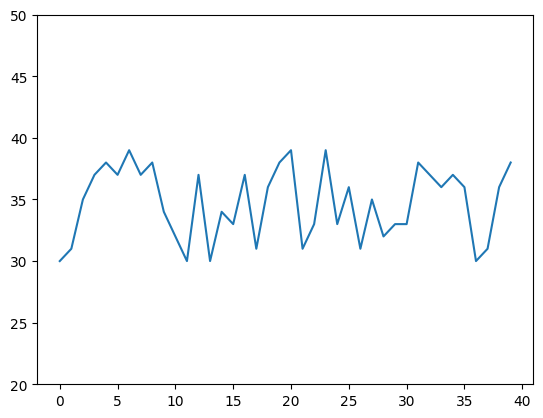

In [42]:
# einen zufälligen Y-Wert generieren
y = np.random.randint(30, 40, size=(40))
# y-Liste anzeigen
print(y)
# y plotten
plt.plot(y)
# y-Achse begrenzen auf Bereich 20-50
plt.ylim(20,50)

Wir möchten einzelne Bilder, um damit unser animiertes GIF zu erstellen. Wir können das anhand der letzten 4 Datenpunkte demonstrieren, indem wir die letzten 4 Werte der y-Liste raus-slicen und als Bilder abspeichern.

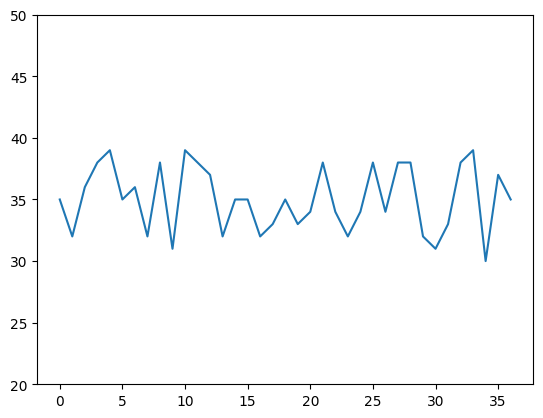

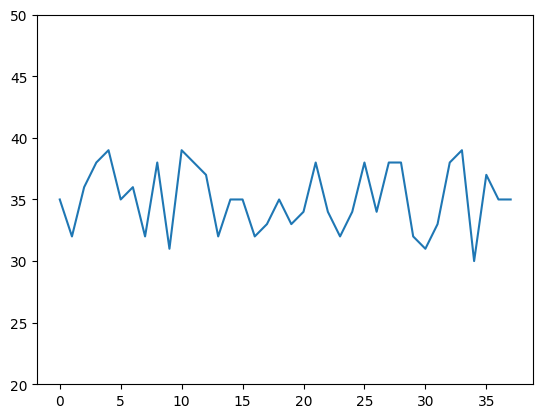

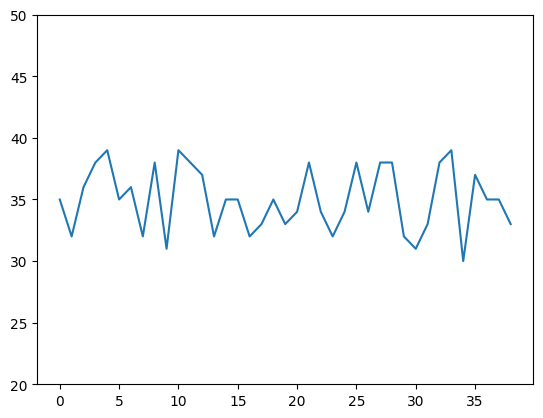

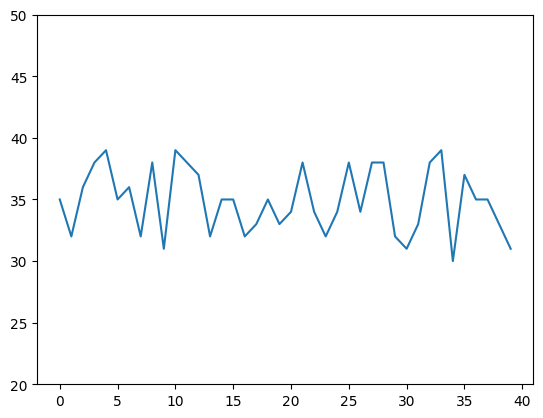

In [41]:
## Eins ##
plt.plot(y[:-3])
plt.ylim(20,50)
plt.savefig('1.png')
plt.show()
## Zwei ##
plt.plot(y[:-2])
plt.ylim(20,50)
plt.savefig('2.png')
plt.show()
## Drei ##
plt.plot(y[:-1])
plt.ylim(20,50)
plt.savefig('3.png')
plt.show()
## Vier ##
plt.plot(y)
plt.ylim(20,50)
plt.savefig('4.png')
plt.show()

Super. Jetzt müssen wir die Bilder nur noch mit Hilfe von `imageio`zusammenfuegen.

In [43]:
with iio.get_writer('mygif.gif', mode='I') as writer:
    for filename in ['1.png', '2.png', '3.png', '4.png']:
        image = iio.imread(filename)
        writer.append_data(image)

Aber wo ist die Datei? Schauen sie links unter ihren Dateien nach. Sie finden die einzelnen Dateien und auch das animierte gif "meingif.gif".
Um alle Werte der y-Liste in der Animation zu zeigen, werden wir eine for-Schleife (for-Loop) verwenden:

In [55]:
filenames = []
for i in y:
    # plot the line chart
    plt.plot(y[:i])
    plt.ylim(20,50)
    plt.xlabel("x-Achse")
    plt.ylabel("y-Achse")
    
    # create file name and append it to a list
    filename = f'{i}.png'
    filenames.append(filename)
    
    # save frame
    plt.savefig(filename)
    plt.close()
# build gif
with iio.get_writer('mygif.gif', mode='I') as writer:
    for filename in filenames:
        image = iio.imread(filename)
        writer.append_data(image)
        
# Remove files
for filename in set(filenames):
    os.remove(filename)